In [ ]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
  p.zoom_random(probability=0.5, percentage_area=0.9)
  p.crop_random(probability=0.6, percentage_area=0.9)
  p.resize(probability=1.0, width=64, height=64)

  p.sample(sebanyak_ini)

In [1]:
import glob

daftar_folder=glob.glob("dataset_latihan/train/*")

In [ ]:
for nama in daftar_folder:
    nama_folder=nama.split("/")[-1].split("\\")[-1]
    os.mkdir("dataset_latihan/val/"+nama_folder)

In [1]:
haha = "ini adalah kalimat biasa ada folder di c:/b/d/a/kkk.jpg"

haha.split("/")[-1].split(".")[0]

'kkk'

In [ ]:
# daftar_folder[0].split("/")[-1].split("\\")[-1]
import random
import shutil

for nama in daftar_folder:
    nama_folder=nama.split("/")[-1].split("\\")[-1]
    #os.remove(nama+'/'+nama_folder+'.png')
    isi_folder = glob.glob(nama+"/*.png")
    random.shuffle(isi_folder)
    for c,nama_file in enumerate(isi_folder[:30]):
        shutil.move (nama_file, "dataset_latihan/val/"+nama_folder+"/"+str(c)+".png")
    print(isi_folder)

In [ ]:
for c, nama_file in enumerate(isi_folder[:30]):
    print(c, nama_file)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy


size_ = 32

model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 22, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])
model.summary()

In [156]:
import cv2

x = []
y = []

list_folder = glob.glob("dataset_latihan/train/*")
for c, nama_folder in enumerate(list_folder):
    list_gambar = glob.glob(nama_folder+"/*.png")
    for nama_gambar in list_gambar:
        gambar = cv2.imread(nama_gambar)/255
        gambar = cv2.resize(gambar, (32, 32))
        x.append(gambar)
        y.append(c)

In [ ]:
import random
import numpy as np

z = list(zip(x, y))
random.shuffle(z)
x, y = zip(*z)
x = np.array(x)
y = np.array(y)

model.fit(x, y, batch_size=2, epochs=30, validation_split=0.1)

In [110]:
letterB = "dataset_latihan/test/B/B.png"
letterD = "dataset_latihan/test/D/D.png"
letterG = "dataset_latihan/test/G/G.png"

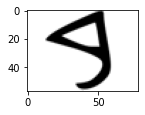

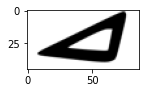

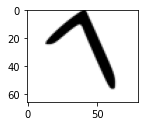

In [111]:
import matplotlib.pyplot as plt


def tampilkan_(ini):
  fig = plt.figure(figsize=(2, 2))
  img = plt.imread(ini)
  plt.imshow(img)
  plt.show()

tampilkan_(letterB)
tampilkan_(letterD)
tampilkan_(letterG)

In [112]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'B', 1: 'D', 2: 'G', 3: 'H', 4: 'H1', 5: 'K', 6: 'L', 7: 'M', 8: 'N', 9: 'P', 10: 'Q', 11: 'R', 12: 'S', 13: 'S1', 14: 'S2', 15: 'T', 16: 'T1', 17: 'W', 18: 'Y', 19: 'Z', 20: 'koma', 21: 'petik'}


In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(letterB, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", "Letter B", "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")